### Data Preparation

#### 1. Data Preprocessing

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided datasets
file_paths = {
    'CO': 'Data/CO.csv',
    'NO2': 'Data/NO2.csv',
    'NOX': 'Data/NOX.csv',
    'O3': 'Data/O3.csv',
    'PM25': 'Data/PM25.csv',
    'PM10': 'Data/PM10.csv',
    'SO2': 'Data/SO2.csv'
}

dataframes = {pollutant: pd.read_csv(filepath) for pollutant, filepath in file_paths.items()}

for pollutant, df in dataframes.items():
    print(f"First few rows of the {pollutant} dataset:")
    display(df.head())
    print("\n")

First few rows of the CO dataset:


,DATE,HOUR,POLLUTANT,SHATIN,TSUEN WAN,CENTRAL,EASTERN,KWUN TONG,TUEN MUN,TUNG CHUNG,...,YUEN LONG,CENTRAL/WESTERN,NORTH,KWAI CHUNG,TAP MUN,TSEUNG KWAN O,TAI PO,MONG KOK,CAUSEWAY BAY,Average
0,1991-01-04,1,Carbon Monoxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-04,23,Carbon Monoxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,157.0
2,1991-01-04,22,Carbon Monoxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,200.0
3,1991-01-04,21,Carbon Monoxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,NaN,147.0
4,1991-01-04,20,Carbon Monoxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.0,NaN,193.0




First few rows of the NO2 dataset:


,DATE,HOUR,POLLUTANT,SHATIN,TSUEN WAN,CENTRAL,EASTERN,KWUN TONG,TUEN MUN,TUNG CHUNG,...,YUEN LONG,CENTRAL/WESTERN,NORTH,KWAI CHUNG,TAP MUN,TSEUNG KWAN O,TAI PO,MONG KOK,CAUSEWAY BAY,Average
0,1990-01-01,1,Nitrogen Dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,24,Nitrogen Dioxide,NaN,22.0,NaN,NaN,41.0,NaN,NaN,...,NaN,79.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN,43.0
2,1990-01-01,23,Nitrogen Dioxide,NaN,22.0,NaN,NaN,43.0,NaN,NaN,...,NaN,48.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN,37.0
3,1990-01-01,22,Nitrogen Dioxide,NaN,26.0,NaN,NaN,42.0,NaN,NaN,...,NaN,46.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,37.8
4,1990-01-01,21,Nitrogen Dioxide,NaN,29.0,NaN,NaN,42.0,NaN,NaN,...,NaN,57.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN,42.2




First few rows of the NOX dataset:


,DATE,HOUR,POLLUTANT,SHATIN,TSUEN WAN,CENTRAL,EASTERN,KWUN TONG,TUEN MUN,TUNG CHUNG,...,YUEN LONG,CENTRAL/WESTERN,NORTH,KWAI CHUNG,TAP MUN,TSEUNG KWAN O,TAI PO,MONG KOK,CAUSEWAY BAY,Average
0,1990-01-01,1,Nitrogen Oxides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,24,Nitrogen Oxides,NaN,74.0,NaN,NaN,151.0,NaN,NaN,...,NaN,181.0,NaN,75.0,NaN,NaN,NaN,NaN,NaN,114.0
2,1990-01-01,23,Nitrogen Oxides,NaN,98.0,NaN,NaN,182.0,NaN,NaN,...,NaN,221.0,NaN,95.0,NaN,NaN,NaN,NaN,NaN,138.4
3,1990-01-01,22,Nitrogen Oxides,NaN,60.0,NaN,NaN,264.0,NaN,NaN,...,NaN,155.0,NaN,108.0,NaN,NaN,NaN,NaN,NaN,140.4
4,1990-01-01,21,Nitrogen Oxides,NaN,50.0,NaN,NaN,346.0,NaN,NaN,...,NaN,121.0,NaN,114.0,NaN,NaN,NaN,NaN,NaN,152.8




First few rows of the O3 dataset:


,DATE,HOUR,POLLUTANT,SHATIN,TSUEN WAN,CENTRAL,EASTERN,KWUN TONG,TUEN MUN,TUNG CHUNG,...,YUEN LONG,CENTRAL/WESTERN,NORTH,KWAI CHUNG,TAP MUN,TSEUNG KWAN O,TAI PO,MONG KOK,CAUSEWAY BAY,Average
0,1990-01-01,1,Ozone,NaN,18.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,17.5
1,1990-01-01,24,Ozone,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0
2,1990-01-01,23,Ozone,NaN,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0
3,1990-01-01,22,Ozone,NaN,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0
4,1990-01-01,21,Ozone,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.5




First few rows of the PM25 dataset:


,DATE,HOUR,POLLUTANT,SHATIN,TSUEN WAN,CENTRAL,EASTERN,KWUN TONG,TUEN MUN,TUNG CHUNG,...,YUEN LONG,CENTRAL/WESTERN,NORTH,KWAI CHUNG,TAP MUN,TSEUNG KWAN O,TAI PO,MONG KOK,CAUSEWAY BAY,Average
0,1999-01-01,1,Fine Suspended Particulates,NaN,73.0,72.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,66.000000
1,1999-01-01,23,Fine Suspended Particulates,NaN,80.0,67.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,63.666667
2,1999-01-01,22,Fine Suspended Particulates,NaN,95.0,77.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,76.666667
3,1999-01-01,21,Fine Suspended Particulates,NaN,109.0,91.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,86.000000
4,1999-01-01,20,Fine Suspended Particulates,NaN,115.0,96.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,89.666667




First few rows of the PM10 dataset:


,DATE,HOUR,POLLUTANT,SHATIN,TSUEN WAN,CENTRAL,EASTERN,KWUN TONG,TUEN MUN,TUNG CHUNG,...,YUEN LONG,CENTRAL/WESTERN,NORTH,KWAI CHUNG,TAP MUN,TSEUNG KWAN O,TAI PO,MONG KOK,CAUSEWAY BAY,Average
0,1993-01-01,1,Respirable Suspended Particulates,56.0,37.0,NaN,NaN,59.0,NaN,NaN,...,NaN,64.0,NaN,37.0,NaN,NaN,NaN,NaN,NaN,50.6
1,1993-01-01,12,Respirable Suspended Particulates,37.0,49.0,NaN,NaN,38.0,NaN,NaN,...,NaN,38.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,38.2
2,1993-01-01,2,Respirable Suspended Particulates,61.0,40.0,NaN,NaN,44.0,NaN,NaN,...,NaN,59.0,NaN,40.0,NaN,NaN,NaN,NaN,NaN,48.8
3,1993-01-01,3,Respirable Suspended Particulates,60.0,38.0,NaN,NaN,37.0,NaN,NaN,...,NaN,45.0,NaN,37.0,NaN,NaN,NaN,NaN,NaN,43.4
4,1993-01-01,4,Respirable Suspended Particulates,40.0,41.0,NaN,NaN,39.0,NaN,NaN,...,NaN,42.0,NaN,35.0,NaN,NaN,NaN,NaN,NaN,39.4




First few rows of the SO2 dataset:


,DATE,HOUR,POLLUTANT,SHATIN,TSUEN WAN,CENTRAL,EASTERN,KWUN TONG,TUEN MUN,TUNG CHUNG,...,YUEN LONG,CENTRAL/WESTERN,NORTH,KWAI CHUNG,TAP MUN,TSEUNG KWAN O,TAI PO,MONG KOK,CAUSEWAY BAY,Average
0,1990-01-01,1,Sulphur Dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,12,Sulphur Dioxide,NaN,19.0,NaN,NaN,21.0,NaN,NaN,...,NaN,10.0,NaN,43.0,NaN,NaN,NaN,NaN,NaN,19.8
2,1990-01-01,2,Sulphur Dioxide,NaN,12.0,NaN,NaN,6.0,NaN,NaN,...,NaN,3.0,NaN,40.0,NaN,NaN,NaN,NaN,NaN,12.6
3,1990-01-01,3,Sulphur Dioxide,NaN,9.0,NaN,NaN,8.0,NaN,NaN,...,NaN,5.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,12.2
4,1990-01-01,4,Sulphur Dioxide,NaN,8.0,NaN,NaN,8.0,NaN,NaN,...,NaN,4.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,11.0


#### 1.1 Data Cleaning

In [14]:
def clean_and_reformat(data_path):
    # Load the data from the specified path
    data = pd.read_csv(data_path)
    
    # Replace 'N.A.' with NaN and attempt to convert all columns to numeric, ignoring errors
    data = data.replace('N.A.', pd.NA).apply(pd.to_numeric, errors='ignore')
    
    # Convert 'DATE' to datetime and create 'DATETIME' column combining 'DATE' and 'HOUR'
    data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=False, errors='coerce')
    data['DATETIME'] = data['DATE'] + pd.to_timedelta(data['HOUR'] - 1, unit='h')
    
    # Filter to include only data from the year 2000 onwards
    data = data[data['DATETIME'] >= '2000-01-01']
    
    # Select only the columns we are interested in
    if 'Average' in data.columns:
        data = data[['DATE', 'HOUR', 'POLLUTANT', 'Average', 'DATETIME']]
    else:
        print(f"Average column not found in {data_path}")
    
    # Set 'DATETIME' as the index of the DataFrame
    data = data.set_index('DATETIME')
    
    return data


# clean and reformat each dataset
datasets = {pollutant: clean_and_reformat(path) for pollutant, path in file_paths.items()}

# combine all datasets
all_data = pd.concat(datasets.values(), axis=1, keys=datasets.keys())

all_data.head()


CO                                          NO2   
                          DATE HOUR        POLLUTANT     Average       DATE   
DATETIME                                                                      
2000-01-01 00:00:00 2000-01-01    1  Carbon Monoxide  105.333333 2000-01-01  \
2000-01-01 01:00:00 2000-01-01    2  Carbon Monoxide   95.666667 2000-01-01   
2000-01-01 02:00:00 2000-01-01    3  Carbon Monoxide  109.000000 2000-01-01   
2000-01-01 03:00:00 2000-01-01    4  Carbon Monoxide   97.833333 2000-01-01   
2000-01-01 04:00:00 2000-01-01    5  Carbon Monoxide   92.000000 2000-01-01   

                                                             NOX       ...   
                    HOUR         POLLUTANT    Average       DATE HOUR  ...   
DATETIME                                                               ...   
2000-01-01 00:00:00    1  Nitrogen Dioxide  71.307692 2000-01-01    1  ...  \
2000-01-01 01:00:00    2  Nitrogen Dioxide  59.846154 2000-01-01    2  ...   
2000-01-01 02:00:00    3  Nitrogen Dioxide  64.538462 2000-01-01    3  ...   
2000-01-01 03:00:00    4  Nitrogen Dioxide  62.615385 2000-01-01    4  ...   
2000-01-01 04:00:00    5  Nitrogen Dioxide  57.461538 2000-01-01    5  ...   

                                             PM25               PM10        
                                        POLLUTANT Average       DATE HOUR   
DATETIME                                                                    
2000-01-01 00:00:00  Fine Suspended Particulates    38.75 2000-01-01    1  \
2000-01-01 01:00:00  Fine Suspended Particulates    34.50 2000-01-01    2   
2000-01-01 02:00:00  Fine Suspended Particulates    35.00 2000-01-01    3   
2000-01-01 03:00:00  Fine Suspended Particulates    33.00 2000-01-01    4   
2000-01-01 04:00:00  Fine Suspended Particulates    31.25 2000-01-01    5   

                                                                         SO2   
                                             POLLUTANT    Average       DATE   
DATETIME                                                                       
2000-01-01 00:00:00  Respirable Suspended Particulates  64.769231 2000-01-01  \
2000-01-01 01:00:00  Respirable Suspended Particulates  57.230769 2000-01-01   
2000-01-01 02:00:00  Respirable Suspended Particulates  57.076923 2000-01-01   
2000-01-01 03:00:00  Respirable Suspended Particulates  54.846154 2000-01-01   
2000-01-01 04:00:00  Respirable Suspended Particulates  53.769231 2000-01-01   

                                                     
                    HOUR        POLLUTANT   Average  
DATETIME                                             
2000-01-01 00:00:00    1  Sulphur Dioxide  7.615385  
2000-01-01 01:00:00    2  Sulphur Dioxide  6.692308  
2000-01-01 02:00:00    3  Sulphur Dioxide  6.769231  
2000-01-01 03:00:00    4  Sulphur Dioxide  7.769231  
2000-01-01 04:00:00    5  Sulphur Dioxide  7.923077  

[5 rows x 28 columns]

In [15]:
# generate statistical summary for each pollutant
statistical_summary = all_data.describe()


##### $CO$

In [17]:
# show  statistical summary
statistical_summary['CO']

,DATE,HOUR,Average
count,209640,209640.000000,209626.000000
mean,2011-12-16 05:20:28.574699520,12.500000,79.970578
min,2000-01-01 00:00:00,1.000000,20.600000
25%,2005-12-23 00:00:00,6.750000,58.857143
50%,2011-12-16 00:00:00,12.500000,74.500000
75%,2017-12-08 00:00:00,18.250000,95.428571
max,2023-12-11 00:00:00,24.000000,338.600000
std,NaN,6.922203,28.840783


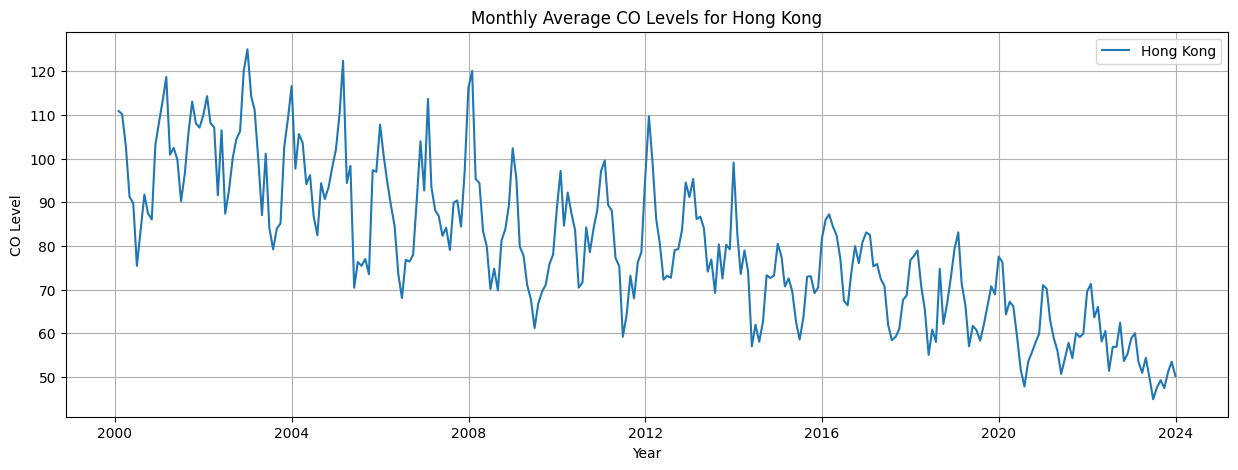

In [34]:
co_data = all_data['CO']

def plot_co(data):
    monthly_data = data['Average'].resample('M').mean()

    plt.figure(figsize=(15, 5))
    plt.plot(monthly_data.index, monthly_data, linestyle='-', label='Hong Kong')
    plt.title('Monthly Average CO Levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('CO Level')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_co(co_data)

##### $NO_2$

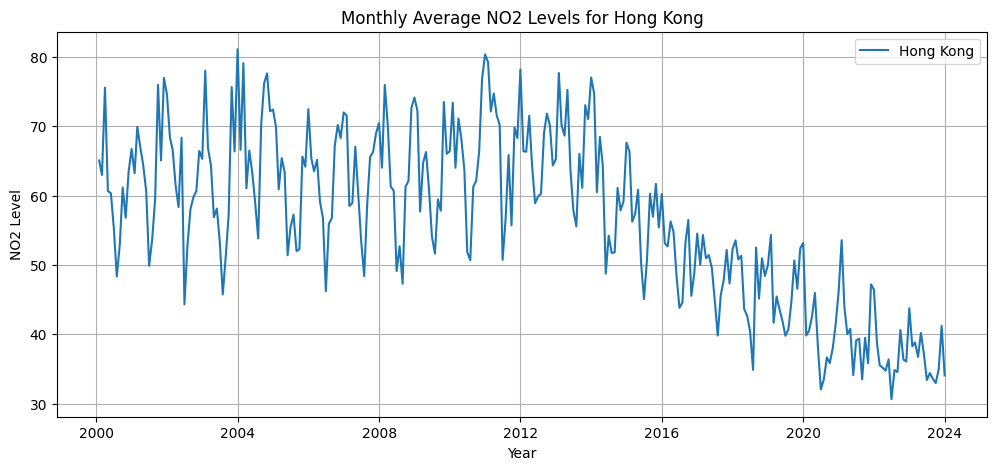

In [37]:
no2_data = all_data['NO2']

# plot the 'NO2' data for the average level of all locations
def plot_no2(data):
    monthly_data = data['Average'].resample('M').mean()
    plt.figure(figsize=(12, 5))    
    plt.plot(monthly_data.index, monthly_data, linestyle='-', label='Hong Kong')
    plt.title('Monthly Average NO2 Levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('NO2 Level')
    plt.legend()
    plt.grid(True)   
    plt.show()

 
plot_no2(no2_data)



##### $NOX$

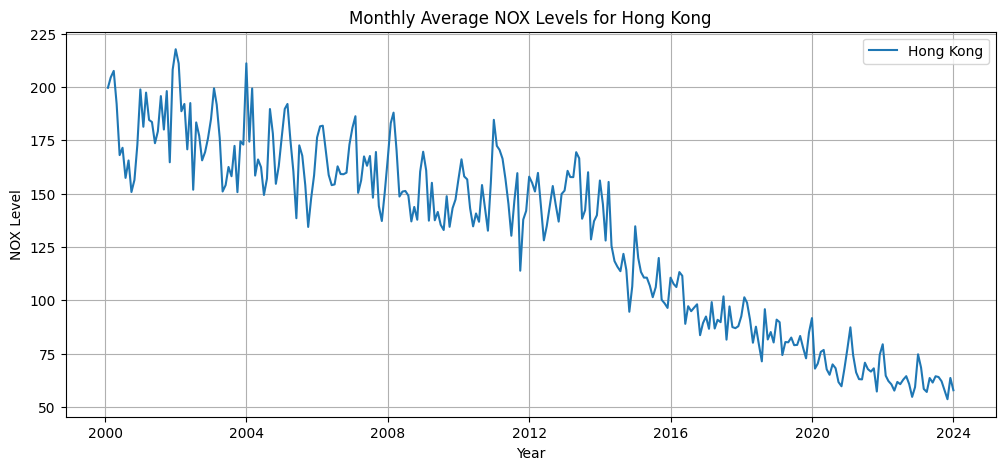

In [41]:
nox_data = all_data['NOX']

def plot_nox(data):
    monthly_data = data['Average'].resample('M').mean()
    plt.figure(figsize=(12, 5))    
    plt.plot(monthly_data.index, monthly_data, linestyle='-', label='Hong Kong')
    plt.title('Monthly Average NOX Levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('NOX Level')
    plt.legend()
    plt.grid(True)   
    plt.show()

 
plot_nox(nox_data)



##### $O_3$

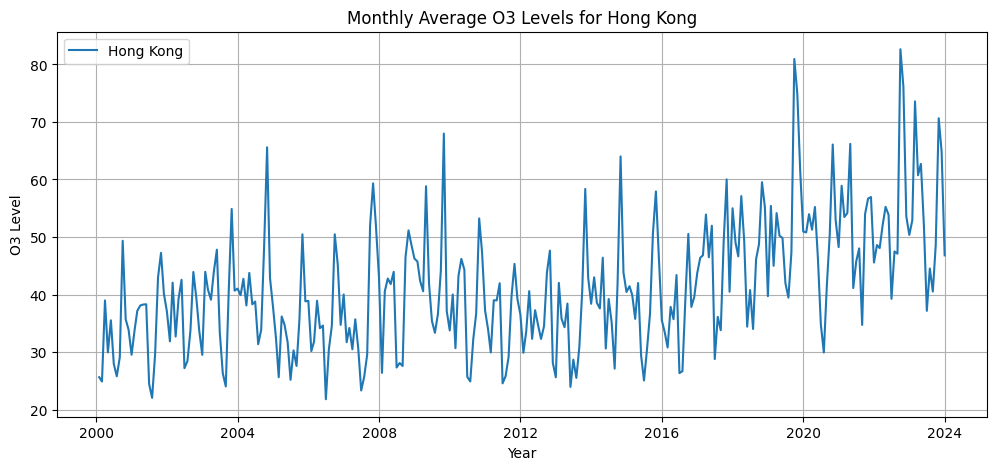

In [42]:
o3_data = all_data['O3']

def plot_o3(data):
    monthly_data = data['Average'].resample('M').mean()
    plt.figure(figsize=(12, 5))    
    plt.plot(monthly_data.index, monthly_data, linestyle='-', label='Hong Kong')
    plt.title('Monthly Average O3 Levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('O3 Level')
    plt.legend()
    plt.grid(True)   
    plt.show()

 
plot_o3(o3_data)


##### $PM25$

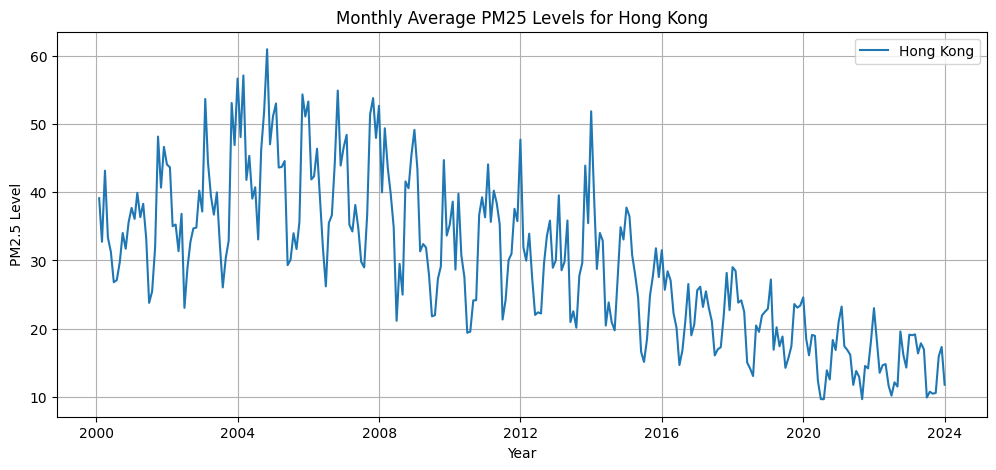

In [43]:
pm25_data = all_data['PM25']

def plot_pm25(data):
    monthly_data = data['Average'].resample('M').mean()
    plt.figure(figsize=(12, 5))    
    plt.plot(monthly_data.index, monthly_data, linestyle='-', label='Hong Kong')
    plt.title('Monthly Average PM25 Levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('PM2.5 Level')
    plt.legend()
    plt.grid(True) 
    plt.show()

 
plot_pm25(pm25_data)


##### $PM10$

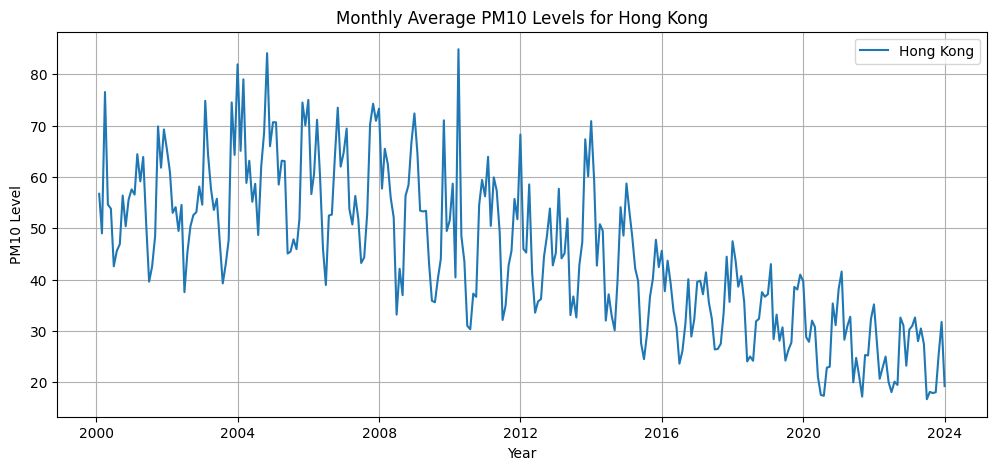

In [44]:
pm10_data = all_data['PM10']

def plot_pm10(data):
    monthly_data = data['Average'].resample('M').mean()
    plt.figure(figsize=(12, 5))    
    plt.plot(monthly_data.index, monthly_data, linestyle='-', label='Hong Kong')
    plt.title('Monthly Average PM10 Levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('PM10 Level')
    plt.legend()
    plt.grid(True) 
    plt.show()

 
plot_pm10(pm10_data)

##### $SO_2$

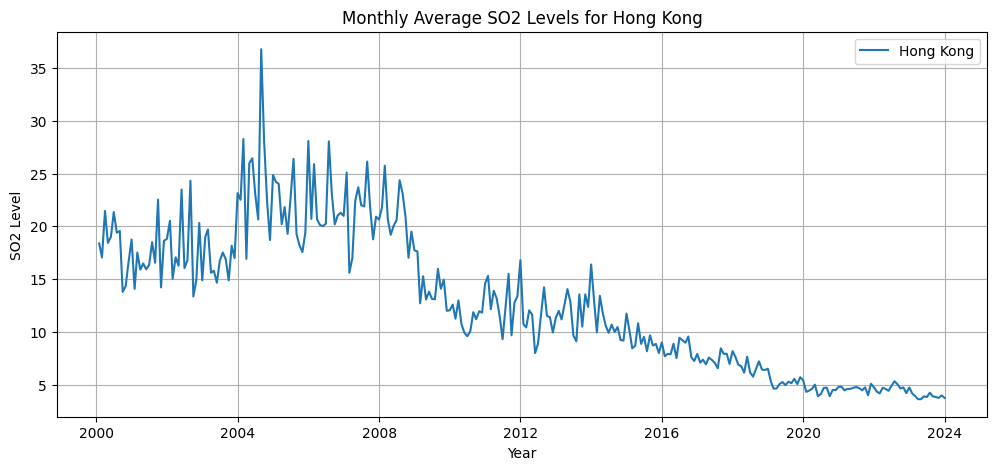

In [45]:
# Continuing from your existing code
so2_data = all_data['SO2']

def plot_so2(data):
    monthly_data = data['Average'].resample('M').mean()
    plt.figure(figsize=(12, 5))    
    plt.plot(monthly_data.index, monthly_data, linestyle='-', label='Hong Kong')
    plt.title('Monthly Average SO2 Levels for Hong Kong')
    plt.xlabel('Year')
    plt.ylabel('SO2 Level')
    plt.legend()
    plt.grid(True) 
    plt.show()

 
plot_so2(so2_data)
